In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
import h5py
import scipy.signal as scisig
import importlib
import analysis_utils as au
import cmath

For calibration look at PSD and compare to FT height

In [56]:
filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250515\2.5 V\pos0\tt0.hdf5'
data, attrs = au.load_data_lf(filename)
PSD = scisig.welch(data['channel_d'], fs = 1/attrs['delta_t'], nperseg = int(1/attrs['delta_t']))

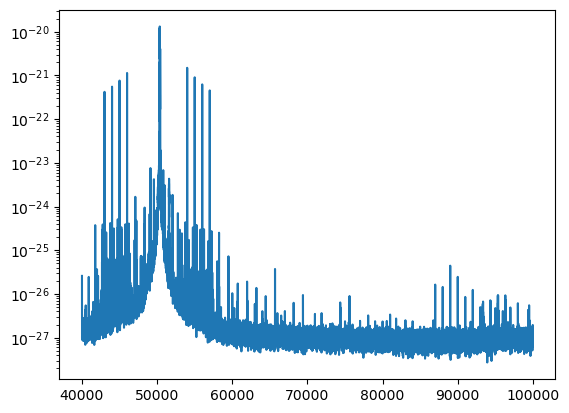

In [57]:
cal = 10**(-15)*0.75 # Matching to Yu-Han's calibration
lb = 40000
ub = 100000
plt.plot(PSD[0][lb:ub], PSD[1][lb:ub]*cal)
plt.yscale('log')

In [9]:
freqs = [43000, 44000, 45000, 46000, 54000, 55000, 56000, 57000]
files = [0]
positions = np.linspace(0, 15, 16, dtype=int)
phases_pos = np.zeros((len(positions), 8, len(files)*10))
amps_pos = np.zeros((len(positions), 8, len(files)*10))

for posind, position in enumerate(positions):
    path = r'D:\Lab Data\lorentz_force\sphere20250507\20250515\2.5 V\pos'+str(position)+r'\tt'
    files = [0]
    end = '.hdf5'
    phases2 = np.zeros((8, len(files)*10))
    amps2 = np.zeros((8, len(files)*10))
    for n, file in enumerate(files):
        filename = path + str(file) + end
        data, attrs = au.load_data_lf(filename)
        for i in range(10):
            drive = data['channel_f'][i*10**6:(i+1)*10**6]
            drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
            fft_drive = np.fft.rfft(drive)
            fft_drive2 = np.fft.rfft(drive2)
            for m, freq in enumerate(freqs):
                phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
                amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
                amps2[m, 10*n+i] = amp
                phases2[m, 10*n+i] = phase[1]
    phases_pos[posind] = phases2
    amps_pos[posind] = amps2

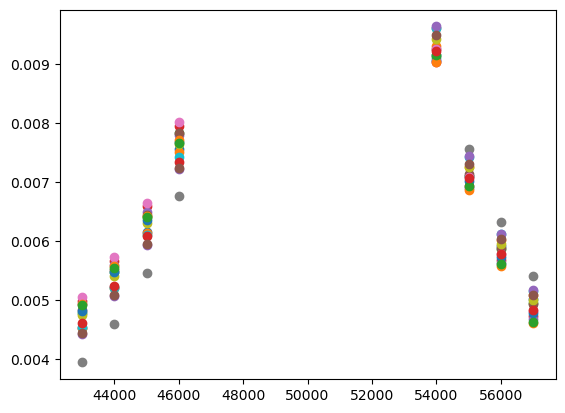

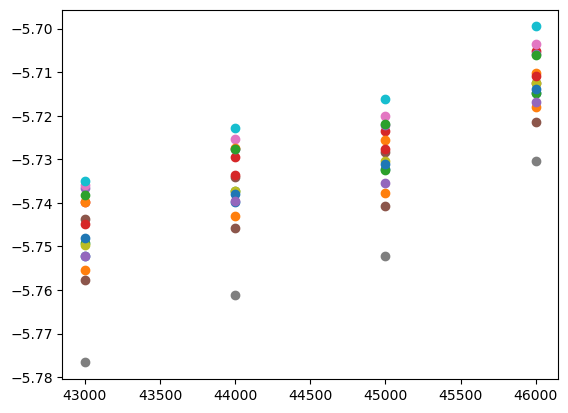

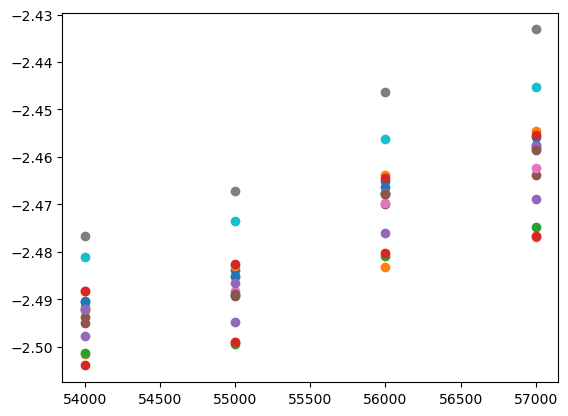

In [10]:

for amp_pos in np.mean(amps_pos, axis = 2):
    plt.plot(freqs, amp_pos, 'o')

plt.figure()
for phase_pos in np.mean(phases_pos, axis = 2):
    plt.plot(freqs[:4], phase_pos[:4], 'o')

plt.figure()
for phase_pos in np.mean(phases_pos, axis = 2):
    plt.plot(freqs[4:], phase_pos[4:], 'o')

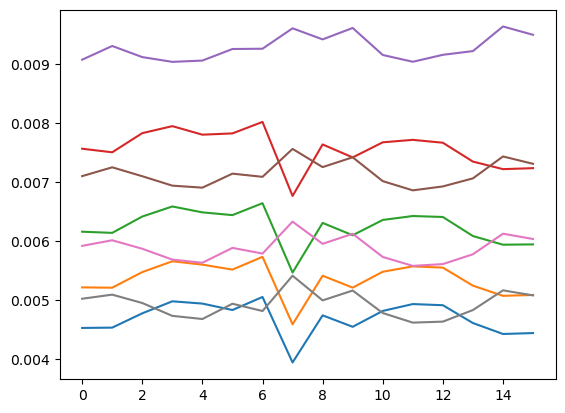

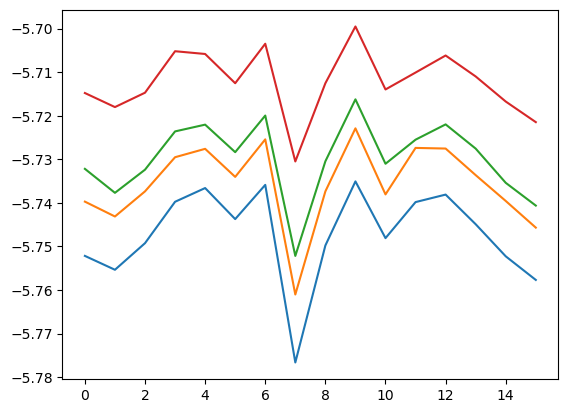

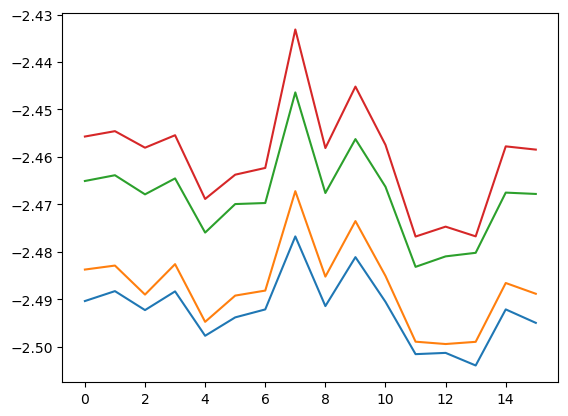

In [17]:
for i in np.transpose(np.mean(amps_pos, axis = 2)):
    plt.plot(positions, i)
plt.figure()
for i in np.transpose(np.mean(phases_pos, axis = 2))[:4]:
    plt.plot(positions, i)

plt.figure()
for i in np.transpose(np.mean(phases_pos, axis = 2))[4:]:
    plt.plot(positions, i)

In [19]:
freqs = [43000, 44000, 45000, 46000, 54000, 55000, 56000, 57000]
files = [0]
positions = np.linspace(0, 15, 16, dtype=int)
phases_pos2 = np.zeros((len(positions), 8, len(files)*10))
amps_pos2 = np.zeros((len(positions), 8, len(files)*10))

for posind, position in enumerate(positions):
    path = r'D:\Lab Data\lorentz_force\sphere20250507\20250515\2.5 V\pos'+str(position)+r' 2\tt'
    files = [0]
    end = '.hdf5'
    phases2 = np.zeros((8, len(files)*10))
    amps2 = np.zeros((8, len(files)*10))
    for n, file in enumerate(files):
        filename = path + str(file) + end
        data, attrs = au.load_data_lf(filename)
        for i in range(10):
            drive = data['channel_f'][i*10**6:(i+1)*10**6]
            drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
            fft_drive = np.fft.rfft(drive)
            fft_drive2 = np.fft.rfft(drive2)
            for m, freq in enumerate(freqs):
                phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
                amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
                amps2[m, 10*n+i] = amp
                phases2[m, 10*n+i] = phase[1]
    phases_pos2[posind] = phases2
    amps_pos2[posind] = amps2

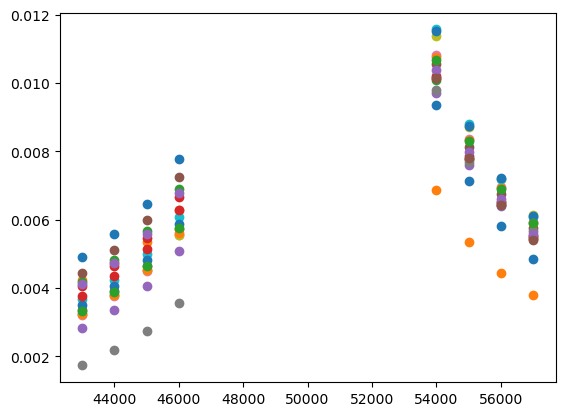

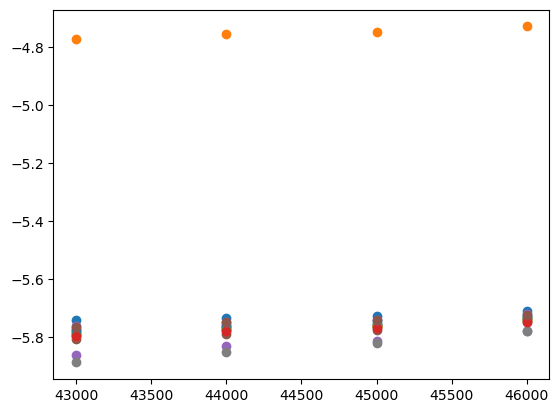

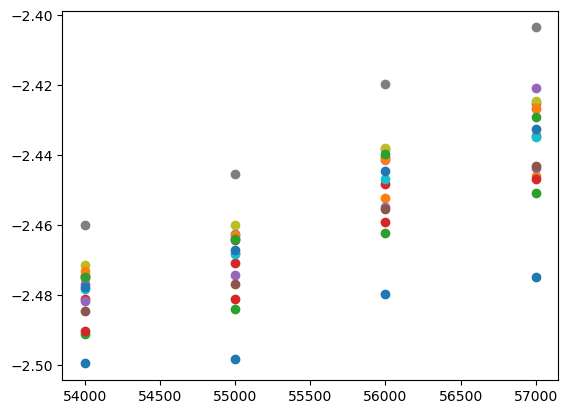

In [22]:

for amp_pos in np.mean(amps_pos2, axis = 2):
    plt.plot(freqs, amp_pos, 'o')

plt.figure()
for phase_pos in np.mean(phases_pos2, axis = 2):
    plt.plot(freqs[:4], phase_pos[:4], 'o')

plt.figure()
for phase_pos in np.mean(phases_pos2, axis = 2):
    plt.plot(freqs[4:], phase_pos[4:], 'o')

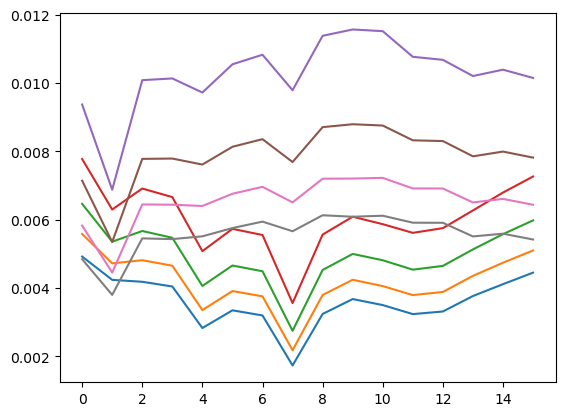

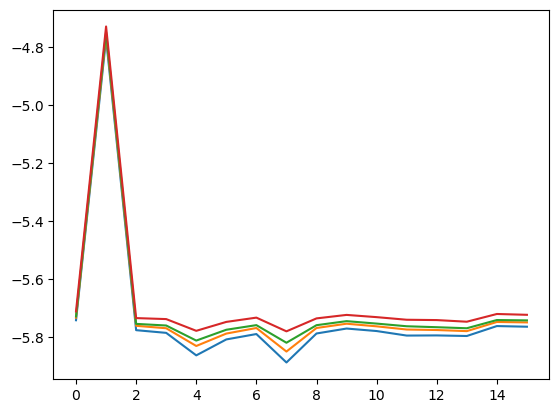

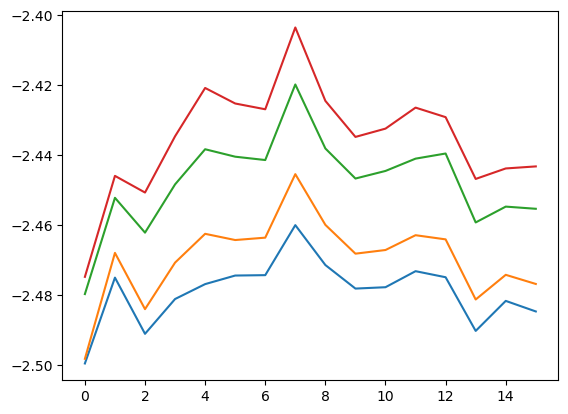

In [23]:
for i in np.transpose(np.mean(amps_pos2, axis = 2)):
    plt.plot(positions, i)
plt.figure()
for i in np.transpose(np.mean(phases_pos2, axis = 2))[:4]:
    plt.plot(positions, i)

plt.figure()
for i in np.transpose(np.mean(phases_pos2, axis = 2))[4:]:
    plt.plot(positions, i)

In [69]:
amp_err = np.zeros((8, 16))
for f in range(8):
    for p in range(16):
        amp_err[f, p] = np.std(amps_pos[p][f])

phase_err = np.zeros((8, 16))
for f in range(8):
    for p in range(16):
        phase_err[f, p] = np.std(phases_pos[p][f])

amp_err2 = np.zeros((8, 16))
for f in range(8):
    for p in range(16):
        amp_err2[f, p] = np.std(amps_pos2[p][f])

phase_err2 = np.zeros((8, 16))
for f in range(8):
    for p in range(16):
        phase_err2[f, p] = np.std(phases_pos2[p][f])

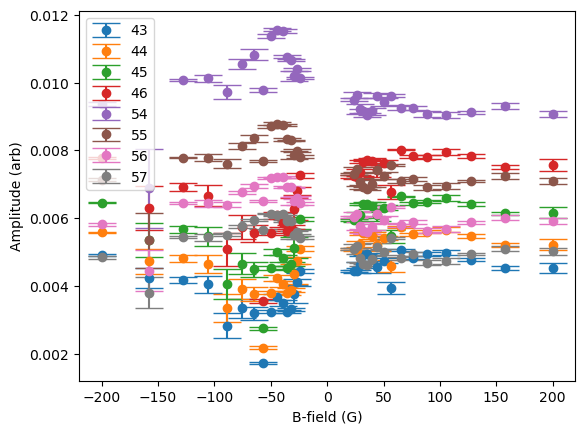

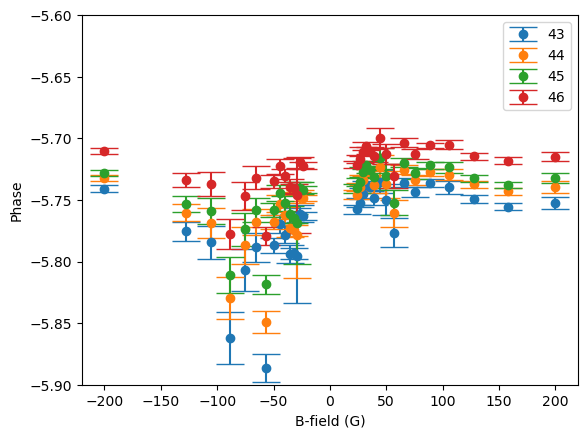

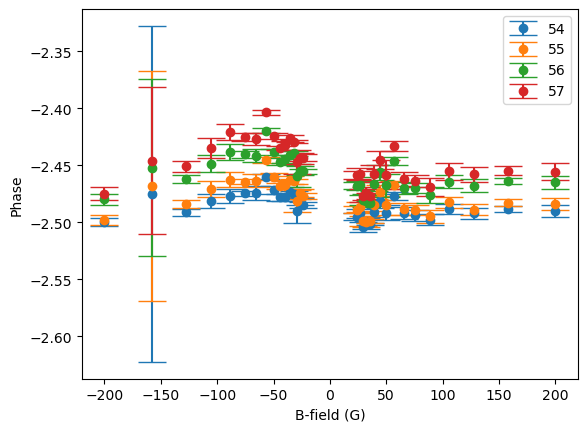

In [71]:
freqlab = [43, 44, 45, 46, 54, 55, 56, 57]

for n, i in enumerate(np.transpose(np.mean(amps_pos, axis = 2))):
    plt.errorbar(1.28/((positions+8)*10**(-2))**2, i, yerr = amp_err[n]/np.sqrt(10), linestyle = 'None', marker = 'o', capsize = 10, label = str(freqlab[n]))
plt.gca().set_prop_cycle(None)
for n, i in enumerate(np.transpose(np.mean(amps_pos2, axis = 2))):
    plt.errorbar(-1.28/((positions+8)*10**(-2))**2, i, yerr = amp_err2[n]/np.sqrt(10), linestyle = 'None', marker = 'o', capsize = 10)
plt.ylabel('Amplitude (arb)')
plt.xlabel('B-field (G)')
plt.legend()

plt.figure()

for n, i in enumerate(np.transpose(np.mean(phases_pos, axis = 2))[:4]):
    plt.errorbar(1.28/((positions+8)*10**(-2))**2, i, yerr = phase_err[n]/np.sqrt(10), linestyle = 'None', marker = 'o', capsize = 10, label = str(freqlab[n]))
plt.gca().set_prop_cycle(None)
for n, i in enumerate(np.transpose(np.mean(phases_pos2, axis = 2))[:4]):
    plt.errorbar(-1.28/((positions+8)*10**(-2))**2, i, yerr = phase_err2[n]/np.sqrt(10), linestyle = 'None', marker = 'o', capsize = 10)
plt.ylabel('Phase')
plt.xlabel('B-field (G)')
plt.legend()
plt.ylim(-5.9, -5.6)

plt.figure()
for n, i in enumerate(np.transpose(np.mean(phases_pos, axis = 2))[4:]):
    plt.errorbar(1.28/((positions+8)*10**(-2))**2, i, yerr = phase_err[n+4]/np.sqrt(10), linestyle = 'None', marker = 'o', capsize = 10, label = str(freqlab[n+4]))
plt.gca().set_prop_cycle(None)
for n, i in enumerate(np.transpose(np.mean(phases_pos2, axis = 2))[4:]):
    plt.errorbar(-1.28/((positions+8)*10**(-2))**2, i, yerr = phase_err2[n+4]/np.sqrt(10), linestyle = 'None', marker = 'o', capsize = 10)
plt.ylabel('Phase')
plt.xlabel('B-field (G)')
plt.legend()

In [29]:
200*0.08**2

1.28

In [30]:
1.28/(0.08+0.15)**2

24.19659735349717

In [39]:
np.std(amps_pos[0][0])

0.0004854737350007716